<a href="https://colab.research.google.com/github/rjarun8/MLMastery/blob/main/Statistical_Methods_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# calculate the pearson ' s correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
data3 = 5 * randn(1000) + 25
# calculate Pearson ' s correlation
corr, p = pearsonr(data1, data3)
# display the correlation
print( ' Pearsons correlation: %.3f ' % corr)
# interpret the significance
alpha = 0.05
if p > alpha:
  print( ' No correlation (fail to reject H0) ' )
else:
  print( ' Some correlation (reject H0) ' )

 Pearsons correlation: -0.051 
 No correlation (fail to reject H0) 


In [4]:
# generate gaussian data samples
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate two sets of univariate observations
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# summarize
print( ' data1: mean=%.3f stdv=%.3f ' % (mean(data1), std(data1)))
print( ' data2: mean=%.3f stdv=%.3f ' % (mean(data2), std(data2)))

 data1: mean=50.303 stdv=4.426 
 data2: mean=51.764 stdv=4.660 


In [6]:
# student ' s t-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# compare samples
stat, p = ttest_ind(data1, data2)
print( ' Statistics=%.3f, p=%.3f ' % (stat, p))
# interpret

alpha = 0.05
if p > alpha:
  print( ' Same distributions (fail to reject H0) ' )
else:
  print( ' Different distributions (reject H0) ' )

 Statistics=-2.262, p=0.025 
 Different distributions (reject H0) 


In [7]:
# paired student ' s t-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_rel
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# compare samples
stat, p = ttest_rel(data1, data2)
print( ' Statistics=%.3f, p=%.3f ' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print( ' Same distributions (fail to reject H0) ' )
else:
  print( ' Different distributions (reject H0) ' )

 Statistics=-2.372, p=0.020 
 Different distributions (reject H0) 


In [8]:
# analysis of variance test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import f_oneway
# seed the random number generator
seed(1)
# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52
# compare samples
stat, p = f_oneway(data1, data2, data3)
print( ' Statistics=%.3f, p=%.3f ' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print( ' Same distributions (fail to reject H0) ' )
else:
  print( ' Different distributions (reject H0) ' )

 Statistics=3.655, p=0.027 
 Different distributions (reject H0) 


In [11]:
# calculate the cohen ' s d between two samples
from numpy.random import randn
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt
# function to calculate cohen ' s d for independent samples
def cohend(d1, d2):
  # calculate the size of samples
  n1, n2 = len(d1), len(d2)
  # calculate the variance of the samples
  s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
  # calculate the pooled standard deviation
  s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
  # calculate the means of the samples
  u1, u2 = mean(d1), mean(d2)
  # calculate the effect size
  return (u1 - u2) / s
# seed random number generator
seed(1)
# prepare data
data1 = 10 * randn(10000) + 60
data2 = 10 * randn(10000) + 55
# calculate cohen ' s d
d = cohend(data1, data2)
print( ' Cohens d: %.3f ' % d)

'''
 Small Effect Size: d=0.20
 Medium Effect Size: d=0.50
 Large Effect Size: d=0.80

'''

 Cohens d: 0.500 


'\n\x88 Small Effect Size: d=0.20\n\x88 Medium Effect Size: d=0.50\n\x88 Large Effect Size: d=0.80\n\n'

 Sample Size: 25.525 


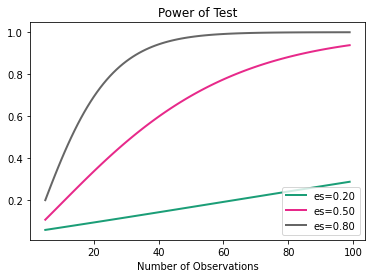

In [14]:
#Power Test
# estimate sample size via power analysis
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect = 0.8
alpha = 0.05
power = 0.8
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print( ' Sample Size: %.3f ' % result)


# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(5, 100))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var= 'nobs' , nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

In [15]:
# scikit-learn bootstrap
from sklearn.utils import resample
# data sample
data = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
# prepare bootstrap sample
boot = resample(data, replace=True, n_samples=4, random_state=1)
print( ' Bootstrap Sample: %s ' % boot)
# out of bag observations
oob = [x for x in data if x not in boot]
print( ' OOB Sample: %s ' % oob)

 Bootstrap Sample: [0.6, 0.4, 0.5, 0.1] 
 OOB Sample: [0.2, 0.3] 


In [16]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold
# data sample
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# prepare cross validation
kfold = KFold(3, True, 1)
# enumerate splits
for train, test in kfold.split(data):
  print( ' train: %s, test: %s ' % (data[train], data[test]))

 train: [0.1 0.4 0.5 0.6], test: [0.2 0.3] 
 train: [0.2 0.3 0.4 0.6], test: [0.1 0.5] 
 train: [0.1 0.2 0.3 0.5], test: [0.4 0.6] 


In [18]:
# parametric tolerance interval


from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import sqrt
from scipy.stats import chi2
from scipy.stats import norm
# seed the random number generator
seed(1)
# generate dataset

data = 5 * randn(100) + 50
# specify degrees of freedom
n = len(data)
dof = n - 1
# specify data coverage
prop = 0.95
prop_inv = (1.0 - prop) / 2.0
gauss_critical = norm.ppf(prop_inv)
print( ' Gaussian critical value: %.3f (coverage=%d%%) ' % (gauss_critical, prop*100))
# specify confidence
prob = 0.99
prop_inv = 1.0 - prob
chi_critical = chi2.ppf(prop_inv, dof)
print( ' Chi-Squared critical value: %.3f (prob=%d%%, dof=%d) ' % (chi_critical, prob*100,
dof))
# tolerance
interval = sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical)
print( ' Tolerance Interval: %.3f ' % interval)
# summarize
data_mean = mean(data)
lower, upper = data_mean-interval, data_mean+interval
print( ' %.2f to %.2f covers %d%% of data with a confidence of %d%% ' % (lower, upper,
prop*100, prob*100))

 Gaussian critical value: -1.960 (coverage=95%) 
 Chi-Squared critical value: 69.230 (prob=99%, dof=99) 
 Tolerance Interval: 2.355 
 47.95 to 52.66 covers 95% of data with a confidence of 99% 


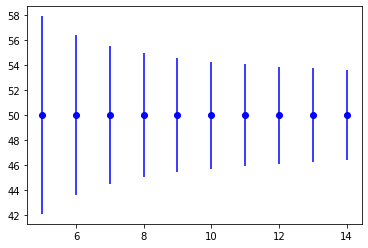

In [19]:
# plot tolerance interval vs sample size
from numpy.random import seed
from numpy.random import randn
from numpy import sqrt
from scipy.stats import chi2
from scipy.stats import norm
from matplotlib import pyplot
# seed the random number generator
seed(1)
# sample sizes
sizes = range(5,15)
for n in sizes:
  # generate dataset
  data = 5 * randn(n) + 50
  # calculate degrees of freedom
  dof = n - 1
  # specify data coverage

  prop = 0.95
  prop_inv = (1.0 - prop) / 2.0
  gauss_critical = norm.ppf(prop_inv)
  # specify confidence
  prob = 0.99
  prop_inv = 1.0 - prob
  chi_critical = chi2.ppf(prop_inv, dof)
  # tolerance
  tol = sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical)
  # plot
  pyplot.errorbar(n, 50, yerr=tol, color= 'blue' , fmt= 'o' )
# plot results
pyplot.show()

In [20]:
#Confidence Interval - parametric

# calculate the confidence interval
from statsmodels.stats.proportion import proportion_confint
# calculate the interval
lower, upper = proportion_confint(88, 100, 0.05)
print( ' lower=%.3f, upper=%.3f ' % (lower, upper))



 lower=0.816, upper=0.944 


In [24]:
# bootstrap confidence intervals - non param
from numpy.random import seed
from numpy.random import rand
from numpy.random import randint

from numpy import mean
from numpy import median
from numpy import percentile
# seed the random number generator
seed(1)
# generate dataset
dataset = 0.5 + rand(1000) * 0.5
# bootstrap
scores = list()
for _ in range(100):
  # bootstrap sample
  indices = randint(0, 1000, 1000)
  sample = dataset[indices]
  # calculate and store statistic
  statistic = mean(sample)
  scores.append(statistic)
print( ' 50th percentile (median) = %.3f ' % median(scores))
# calculate 95% confidence intervals (100 - alpha)
alpha = 5.0
# calculate lower percentile (e.g. 2.5)
lower_p = alpha / 2.0
# retrieve observation at lower percentile
lower = max(0.0, percentile(scores, lower_p))
print( ' %.1fth percentile = %.3f ' % (lower_p, lower))
# calculate upper percentile (e.g. 97.5)
upper_p = (100 - alpha) + (alpha / 2.0)
# retrieve observation at upper percentile
upper = min(1.0, percentile(scores, upper_p))
print( ' %.1fth percentile = %.3f ' % (upper_p, upper))

 50th percentile (median) = 0.750 
 2.5th percentile = 0.741 
 97.5th percentile = 0.757 


 x: mean=100.776 stdv=19.620 
 y: mean=151.050 stdv=22.358 


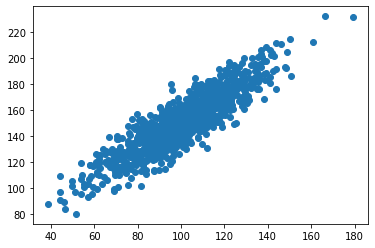

In [25]:
#Prediction Interval

# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
x = 20 * randn(1000) + 100
y = x + (10 * randn(1000) + 50)
# summarize
print( ' x: mean=%.3f stdv=%.3f ' % (mean(x), std(x)))
print( ' y: mean=%.3f stdv=%.3f ' % (mean(y), std(y)))
# plot
pyplot.scatter(x, y)
pyplot.show()

 b0=1.011, b1=49.117 


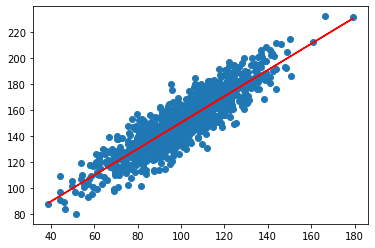

In [27]:
# simple linear regression model
from numpy.random import randn
from numpy.random import seed
from scipy.stats import linregress

from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
x = 20 * randn(1000) + 100
y = x + (10 * randn(1000) + 50)
# fit linear regression model
b1, b0, r_value, p_value, std_err = linregress(x, y)
print( ' b0=%.3f, b1=%.3f ' % (b1, b0))
# make prediction
yhat = b0 + b1 * x
# plot data and predictions
pyplot.scatter(x, y)
pyplot.plot(x, yhat, color= 'r' )
pyplot.show()

 Prediction Interval: 20.204 
 95% likelihood that the true value is between 160.750 and 201.159 
 True value: 183.124 


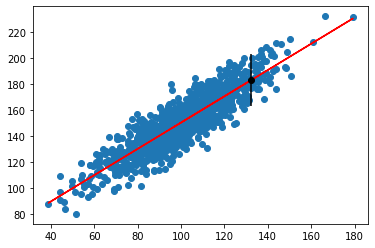

In [29]:
# linear regression prediction with prediction interval
from numpy.random import randn
from numpy.random import seed
from numpy import sqrt
from numpy import sum as arraysum
from scipy.stats import linregress
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
x = 20 * randn(1000) + 100
y = x + (10 * randn(1000) + 50)
# fit linear regression model
b1, b0, r_value, p_value, std_err = linregress(x, y)
# make predictions
yhat = b0 + b1 * x
# define new input, expected value and prediction
x_in = x[0]
y_out = y[0]
yhat_out = yhat[0]
# estimate stdev of yhat
sum_errs = arraysum((y - yhat)**2)
stdev = sqrt(1/(len(y)-2) * sum_errs)
# calculate prediction interval
interval = 1.96 * stdev
print( ' Prediction Interval: %.3f ' % interval)
lower, upper = y_out - interval, y_out + interval
print( ' 95%% likelihood that the true value is between %.3f and %.3f ' % (lower, upper))
print( ' True value: %.3f ' % yhat_out)
# plot dataset and prediction with interval
pyplot.scatter(x, y)
pyplot.plot(x, yhat, color= 'red' )
pyplot.errorbar(x_in, yhat_out, yerr=interval, color= 'black' , fmt= 'o' )
pyplot.show()

In [34]:
#Normality Test

# example of the shapiro-wilk test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(data)
print( ' Statistics=%.3f, p=%.3f ' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print( ' Sample looks Gaussian (fail to reject H0) ' )
else:
  print( ' Sample does not look Gaussian (reject H0) ' )

  # example of the d ' agostino and pearson ' s test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = normaltest(data)
print( ' Statistics=%.3f, p=%.3f ' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print( ' Sample looks Gaussian (fail to reject H0) ' )
else:
  print( ' Sample does not look Gaussian (reject H0) ' )


  # example of the anderson-darling test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
result = anderson(data)
print( ' Statistic: %.3f ' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print( ' %.3f: %.3f, data looks normal (fail to reject H0) ' % (sl, cv))
  else:
    print( ' %.3f: %.3f, data does not look normal (reject H0) ' % (sl, cv))

 Statistics=0.992, p=0.822 
 Sample looks Gaussian (fail to reject H0) 
 Statistics=0.102, p=0.950 
 Sample looks Gaussian (fail to reject H0) 
 Statistic: 0.220 
 15.000: 0.555, data looks normal (fail to reject H0) 
 10.000: 0.632, data looks normal (fail to reject H0) 
 5.000: 0.759, data looks normal (fail to reject H0) 
 2.500: 0.885, data looks normal (fail to reject H0) 
 1.000: 1.053, data looks normal (fail to reject H0) 


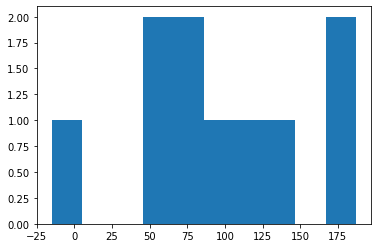

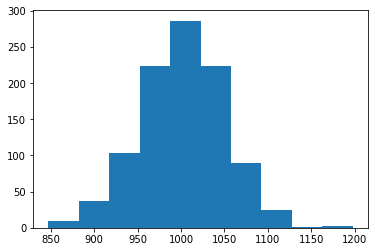

In [36]:
#Making data Normal

# histogram plot of a small sample
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate a univariate data sample
data = 50 * randn(10) + 100
# histogram
pyplot.hist(data)
pyplot.show()



# histogram plot of a small sample
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate a univariate data sample
data = 50 * randn(1000) + 1000
# histogram
pyplot.hist(data)
pyplot.show()

In [38]:
# calculate a 5-number summary
from numpy import percentile
from numpy.random import seed
from numpy.random import rand
# seed random number generator
seed(1)
# generate data sample
data = rand(1000)
# calculate quartiles
quartiles = percentile(data, [25, 50, 75])
# calculate min/max
data_min, data_max = data.min(), data.max()
# display 5-number summary
print( ' Min: %.3f ' % data_min)
print( ' Q1: %.3f ' % quartiles[0])
print( ' Median: %.3f ' % quartiles[1])
print( ' Q3: %.3f ' % quartiles[2])
print( ' Max: %.3f ' % data_max)

 Min: 0.000 
 Q1: 0.252 
 Median: 0.508 
 Q3: 0.751 
 Max: 0.997 


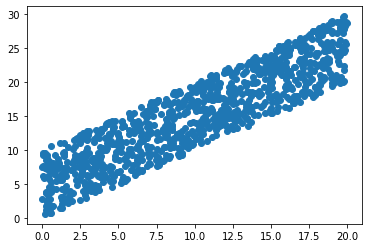

 Spearmans correlation coefficient: 0.900 
 Samples are correlated (reject H0) p=0.000 
 Kendall correlation coefficient: 0.709 
 Samples are correlated (reject H0) p=0.000 


In [43]:
#Rank correnation - non parametric - data does not fit into a distribution

# generate related variables
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)
# plot
pyplot.scatter(data1, data2)
pyplot.show()


# calculate the spearman ' s correlation between two variables
from numpy.random import rand
from numpy.random import seed
from scipy.stats import spearmanr
# seed random number generator
seed(1)
# prepare data
data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)
# calculate spearman ' s correlation
coef, p = spearmanr(data1, data2)
print( ' Spearmans correlation coefficient: %.3f ' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
  print( ' Samples are uncorrelated (fail to reject H0) p=%.3f ' % p)
else:
  print( ' Samples are correlated (reject H0) p=%.3f ' % p)


# calculate the kendall ' s correlation between two variables
from numpy.random import rand
from numpy.random import seed
from scipy.stats import kendalltau
# seed random number generator
seed(1)
# prepare data
data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)
# calculate kendall ' s correlation
coef, p = kendalltau(data1, data2)
print( ' Kendall correlation coefficient: %.3f ' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
  print( ' Samples are uncorrelated (fail to reject H0) p=%.3f ' % p)
else:
  print( ' Samples are correlated (reject H0) p=%.3f ' % p)

In [47]:
#Rank Significance Tests

# example of the mann-whitney u test
from numpy.random import seed
from numpy.random import rand
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 50 + (rand(100) * 10)
data2 = 51 + (rand(100) * 10)
# compare samples
stat, p = mannwhitneyu(data1, data2)
print( ' Statistics=%.3f, p=%.3f ' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print( ' Same distribution (fail to reject H0) ' )
else:
  print( ' Different distribution (reject H0) ' )

  # example of the wilcoxon signed-rank test
from numpy.random import seed
from numpy.random import rand
from scipy.stats import wilcoxon
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 50 + (rand(100) * 10)
data2 = 51 + (rand(100) * 10)
# compare samples
stat, p = wilcoxon(data1, data2)
print( ' Statistics=%.3f, p=%.3f ' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print( ' Same distribution (fail to reject H0) ' )
else:
  print( ' Different distribution (reject H0) ' )

  # example of the kruskal-wallis h-test
from numpy.random import seed
from numpy.random import rand
from scipy.stats import kruskal
# seed the random number generator
seed(1)
# generate three independent samples
data1 = 50 + (rand(100) * 10)
data2 = 51 + (rand(100) * 10)
data3 = 52 + (rand(100) * 10)
# compare samples
stat, p = kruskal(data1, data2, data3)
print( ' Statistics=%.3f, p=%.3f ' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print( ' Same distributions (fail to reject H0) ' )
else:
  print( ' Different distributions (reject H0) ' )

  # example of the friedman test
from numpy.random import seed
from numpy.random import rand
from scipy.stats import friedmanchisquare
# seed the random number generator
seed(1)
# generate three independent samples
data1 = 50 + (rand(100) * 10)
data2 = 51 + (rand(100) * 10)
data3 = 52 + (rand(100) * 10)
# compare samples
stat, p = friedmanchisquare(data1, data2, data3)
print( ' Statistics=%.3f, p=%.3f ' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print( ' Same distributions (fail to reject H0) ' )
else:
  print( ' Different distributions (reject H0) ' )

 Statistics=4077.000, p=0.012 
 Different distribution (reject H0) 
 Statistics=1937.000, p=0.043 
 Different distribution (reject H0) 
 Statistics=34.747, p=0.000 
 Different distributions (reject H0) 
 Statistics=36.240, p=0.000 
 Different distributions (reject H0) 


In [50]:
#Independence Test

# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = [ [10, 20, 30],[6, 9, 17]]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print( ' dof=%d ' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print( ' probability=%.3f, critical=%.3f, stat=%.3f ' % (prob, critical, stat))
if abs(stat) >= critical:
  print( ' Dependent (reject H0) ' )
else:
  print( ' Independent (fail to reject H0) ' )
# interpret p-value
alpha = 1.0 - prob
print( ' significance=%.3f, p=%.3f ' % (alpha, p))
if p <= alpha:
  print( ' Dependent (reject H0) ' )
else:
  print( ' Independent (fail to reject H0) ' )

[[10, 20, 30], [6, 9, 17]]
 dof=2 
[[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]
 probability=0.950, critical=5.991, stat=0.272 
 Independent (fail to reject H0) 
 significance=0.050, p=0.873 
 Independent (fail to reject H0) 
